# Creating a one-dimensional PCA plot, using the first principal component

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# === Step 1: Load spike data from df_units.json ===
def load_spike_data(json_path):
    with open(json_path, 'r') as f:
        df_units = pd.read_json(f)
    return df_units

# === Step 2: Bin spike times into 10 ms intervals ===
def bin_spike_data(df_units, bin_size=0.01):
    all_spike_times = np.concatenate(df_units['times'].values)
    print(f"Total number of spikes: {len(all_spike_times)}")
    t_start = 0
    t_end = np.max(all_spike_times)
    time_bins = np.arange(t_start, t_end + bin_size, bin_size)
    print(f"Time bins from {t_start} to {t_end} with size {bin_size} seconds")
    
    n_bins = len(time_bins) - 1
    n_neurons = len(df_units)
    spike_counts = np.zeros((n_neurons, n_bins))

    for i, spikes in enumerate(df_units['times']):
        counts, _ = np.histogram(spikes, bins=time_bins)
        spike_counts[i, :] = counts

    return spike_counts, time_bins

# === Step 3: Normalize activity in one time bin ===
def compute_activity_profiles(spike_counts, t_bin):
    n_neurons = spike_counts.shape[0]
    
    activity_t = spike_counts[:, t_bin]
    mean_firing = spike_counts.mean(axis=1)
    std_firing = spike_counts.std(axis=1)

    # Relative firing (scaled 0–1 based on mean)
    rel_activity = activity_t / (mean_firing + 1e-6)
    rel_activity = np.clip(rel_activity, 0, 1)

    # Mean-centered (like PCA)
    centered_activity = activity_t - mean_firing

    # Z-scored
    zscored_activity = centered_activity / (std_firing + 1e-6)

    return rel_activity, centered_activity, zscored_activity

# === Step 4: Plot activity profiles ===
def plot_activity_profiles(rel_activity, centered_activity, zscored_activity, t_bin):
    n_neurons = len(rel_activity)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.scatter(rel_activity, np.arange(n_neurons), color='green')
    plt.title(f"Relative Activity (0–1) at t_bin {t_bin}")
    plt.ylabel("Neuron index")
    plt.xlabel("Relative firing")

    plt.subplot(1, 3, 2)
    plt.scatter(centered_activity, np.arange(n_neurons), color='blue')
    plt.title("Mean-Centered Activity")
    plt.xlabel("Centered firing")
    plt.ylabel("Neuron index")

    plt.subplot(1, 3, 3)
    plt.scatter(zscored_activity, np.arange(n_neurons), color='purple')
    plt.title("Z-Scored Activity")
    plt.xlabel("Z-score")
    plt.ylabel("Neuron index")

    plt.tight_layout()
    plt.show()


# === Step 5: Main analysis runner ===
def run_analysis(json_path, t_bin=150, bin_size=0.01, plot=True):
    df_units = load_spike_data(json_path)
    spike_counts, time_bins = bin_spike_data(df_units, bin_size)
    if plot:
        print('spike_counts:', spike_counts)
        if t_bin >= spike_counts.shape[1]:
            t_bin = spike_counts.shape[1] - 1  # ensure within bounds
        rel_activity, centered_activity, zscored_activity = compute_activity_profiles(spike_counts, t_bin)
        plot_activity_profiles(rel_activity, centered_activity, zscored_activity, t_bin)
    else:
        print("Plotting disabled. Only computation will be performed.")

# === Call this function after uploading df_units.json ===
# Example:
# run_analysis('/mnt/data/df_units.json', t_bin=150)


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# === Step 1: Load spike data from df_units.json ===
def load_spike_data(json_path):
    with open(json_path, 'r') as f:
        df_units = pd.read_json(f)
    return df_units

# === Step 1: Load spike data from df_units.json ===
def load_stim_data(json_path):
    with open(json_path, 'r') as f:
        df_units = pd.read_json(f)
    return df_units


# === Step 2: Bin spike times into 10 ms intervals ===
def bin_spike_data(df_units, bin_size=0.01):
    all_spike_times = np.concatenate(df_units['times'].values)
    t_start = 0
    t_end = np.max(all_spike_times)
    time_bins = np.arange(t_start, t_end + bin_size, bin_size)
    
    n_bins = len(time_bins) - 1
    n_neurons = len(df_units)
    spike_counts = np.zeros((n_neurons, n_bins))

    for i, spikes in enumerate(df_units['times']):
        counts, _ = np.histogram(spikes, bins=time_bins)
        spike_counts[i, :] = counts

    return spike_counts, time_bins

# === Step 3: Normalize activity in one time bin ===
def compute_activity_profiles(spike_counts, t_bin):
    n_neurons = spike_counts.shape[0]
    
    activity_t = spike_counts[:, t_bin]
    mean_firing = spike_counts.mean(axis=1)
    std_firing = spike_counts.std(axis=1)

    # Relative firing (scaled 0–1 based on mean)
    rel_activity = activity_t / (mean_firing + 1e-6)
    rel_activity = np.clip(rel_activity, 0, 1)

    # Mean-centered (like PCA)
    centered_activity = activity_t - mean_firing

    # Z-scored
    zscored_activity = centered_activity / (std_firing + 1e-6)

    return rel_activity, centered_activity, zscored_activity

# === Step 4: Plot the activity profile, color-coded by probe ===
def plot_activity_profiles_by_probe(rel_activity, centered_activity, zscored_activity, probes, t_bin):
    n_neurons = len(rel_activity)
    unique_probes = sorted(list(set(probes)))
    color_map = {p: plt.cm.tab10(i % 10) for i, p in enumerate(unique_probes)}
    colors = [color_map[p] for p in probes]

    plt.figure(figsize=(14, 6))

    for i, (data, title) in enumerate(zip(
        [rel_activity, centered_activity, zscored_activity],
        ["Relative Activity (0–1)", "Mean-Centered Activity", "Z-Scored Activity"]
    )):
        plt.subplot(1, 3, i + 1)
        plt.scatter(data, np.arange(n_neurons), c=colors, s=10)
        plt.title(f"{title} at t_bin {t_bin}")
        plt.xlabel("Activity")
        plt.ylabel("Neuron Index")

    plt.tight_layout()
    plt.show()

# === Step 5: Plot subplots for each probe separately ===
def plot_by_individual_probe(rel_activity, probes, t_bin):
    unique_probes = sorted(list(set(probes)))
    n_probes = len(unique_probes)

    plt.figure(figsize=(12, 2.5 * n_probes))

    for i, probe in enumerate(unique_probes):
        idx = [j for j, p in enumerate(probes) if p == probe]
        plt.subplot(n_probes, 1, i + 1)
        plt.scatter(rel_activity[idx], idx, label=f'Probe {probe}', color=plt.cm.tab10(i % 10))
        plt.title(f"Probe {probe} - Relative Activity at t_bin {t_bin}")
        plt.xlabel("Relative firing (0–1)")
        plt.ylabel("Neuron Index")
        plt.legend()

    plt.tight_layout()
    plt.show()

# === Step 6: Main analysis runner with filtering ===
def run_analysis(json_path, t_bin=150, bin_size=0.01):
    df_units = load_spike_data(json_path)

    # Filter for only 'good' units
    df_units = df_units[df_units['KSLabel'] == 'good'].reset_index(drop=True)

    spike_counts, time_bins = bin_spike_data(df_units, bin_size)
    if t_bin >= spike_counts.shape[1]:
        t_bin = spike_counts.shape[1] - 1  # ensure within bounds

    rel_activity, centered_activity, zscored_activity = compute_activity_profiles(spike_counts, t_bin)
    probes = df_units['probe'].tolist()

    # Main plot (color-coded by probe)
    plot_activity_profiles_by_probe(rel_activity, centered_activity, zscored_activity, probes, t_bin)

    # Subplot for each probe
    plot_by_individual_probe(centered_activity, probes, t_bin)


In [19]:
df_units_path = r"G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008\Record Node 103\experiment1\recording1\continuous\intermediates\df_units.json"

In [21]:
# df_units = load_spike_data(df_units_path)
# df_units.head(2)

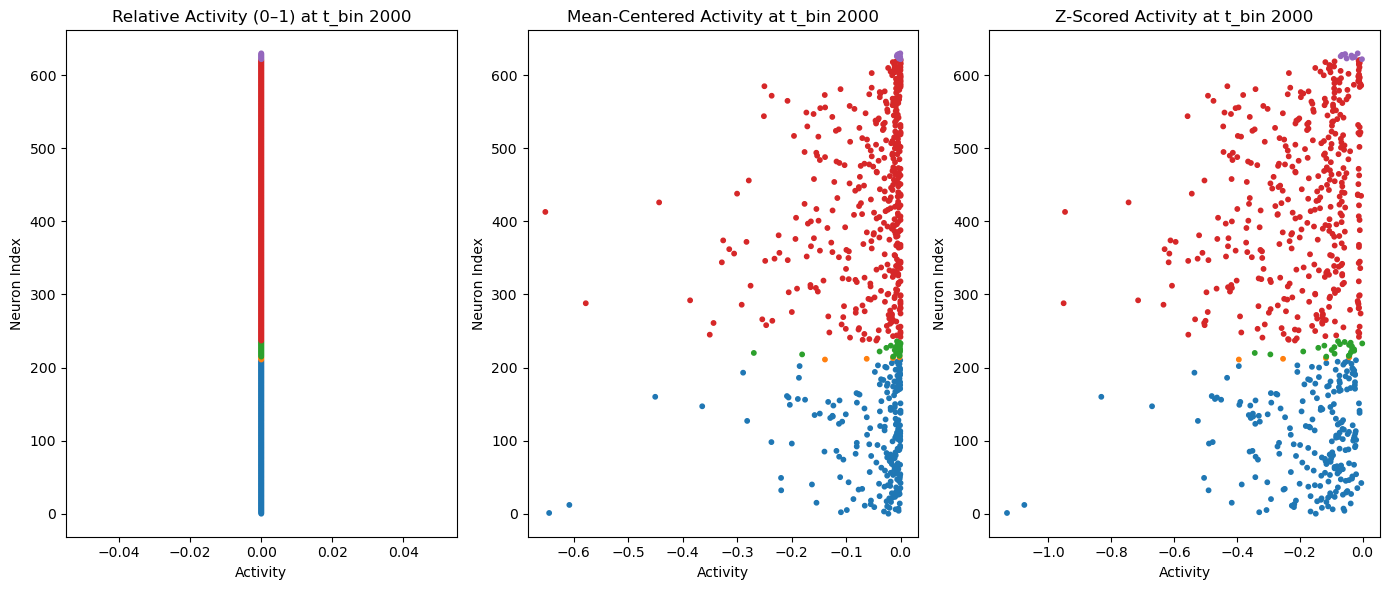

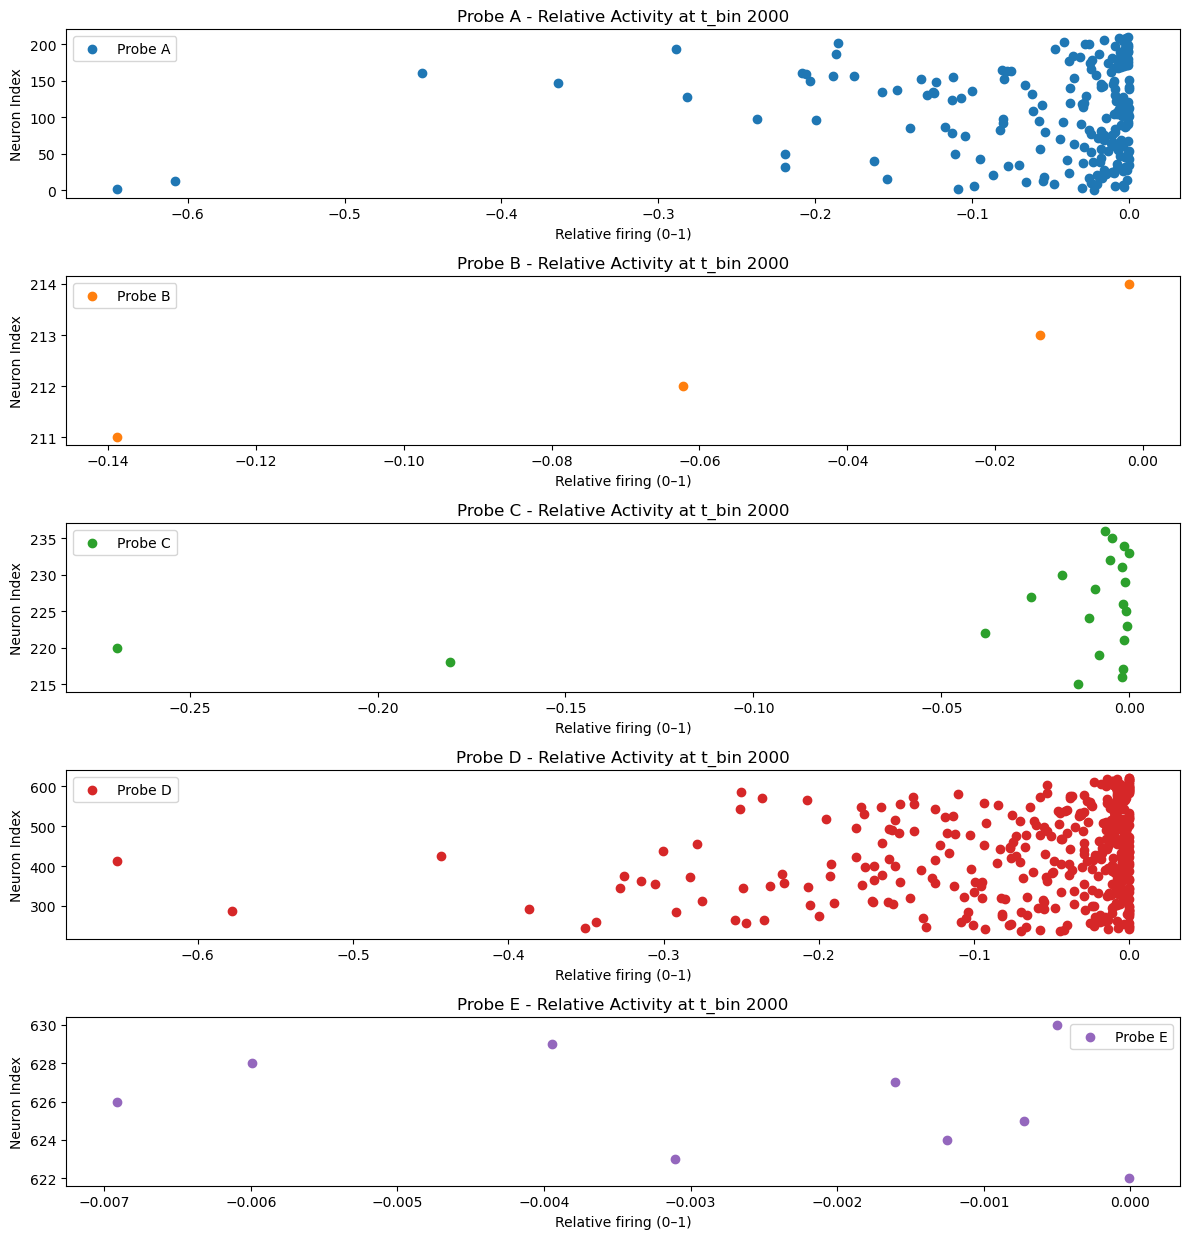

In [22]:
run_analysis(df_units_path, t_bin=2000, bin_size=0.01)
